In [1]:
%load_ext autoreload
%autoreload 2

In [175]:
import parsemadzu as pm
from typing import List

# Will give you a dict where each key is a sample name, and each value is
# another dict, containing the various information in the output.
sections = pm.parse_sections('data/Output 20210927 LC_27092021_026.txt')
list(sections)

['Header',
 'File Information',
 'Sample Information',
 'Original Files',
 'File Description',
 'Configuration',
 'Peak Table(Detector A)',
 'Peak Table(Detector B)',
 'Compound Results(Detector A)',
 'Compound Results(Detector B)',
 'Group Results(Detector A)',
 'Group Results(Detector B)',
 'Slice Data(Detector A)',
 'Slice Data(Detector B)',
 'LC Chromatogram(Detector B-Ch1)',
 'LC Status Trace(Pump A Pressure)',
 'LC Status Trace(Pump A Degasser Pressure)',
 'LC Status Trace(Rack Plate L Temp.)',
 'LC Status Trace(Rack Plate R Temp.)',
 'LC Status Trace(Oven Temp.)',
 'LC Status Trace(Room Temp.)',
 'LC Status Trace(UV Cell Temp.)',
 'LC Status Trace(RID B Cell Temp.)',
 'Fraction Collection Report']

In [139]:
compounds = pm.get_compound_table(sections, detector="B")
compounds[["Name", "Conc."]].to_dict()

{'Name': {0: 'Xylose',
  1: 'Glucose',
  2: 'Mannose',
  3: 'Arabinose',
  4: 'Galactose',
  5: 'Arabitol',
  6: 'Xylitol'},
 'Conc.': {0: 10.742, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0}}

<AxesSubplot:xlabel='R.Time (min)', ylabel='Value (mV)'>

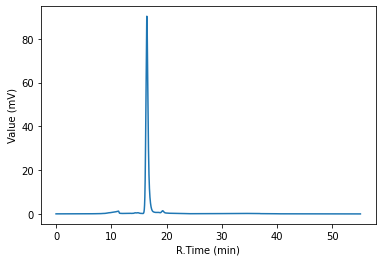

In [130]:
import seaborn as sns

sns.lineplot(data=pm.get_chromatogram_table(sections, detector="B"), x="R.Time (min)", y="Value (mV)")

### Parse multiple

In [149]:
import os

base_dir = "data/20210927/"
filenames = [f for f in os.listdir(base_dir) if not "(" in f] # exclude dupes
file_paths = [os.path.join(base_dir, f) for f in filenames]

file_paths

['data/20210927/20210927 LC_28092021_004.txt',
 'data/20210927/20210927 LC_28092021_002.txt',
 'data/20210927/20210927 LC_28092021_003.txt',
 'data/20210927/20210927 LC_28092021_001.txt',
 'data/20210927/20210927 LC_27092021_026.txt',
 'data/20210927/20210927 LC_27092021_018.txt',
 'data/20210927/20210927 LC_27092021_024.txt',
 'data/20210927/20210927 LC_27092021_025.txt',
 'data/20210927/20210927 LC_27092021_019.txt',
 'data/20210927/20210927 LC_27092021_021.txt',
 'data/20210927/20210927 LC_27092021_009.txt',
 'data/20210927/20210927 LC_27092021_008.txt',
 'data/20210927/20210927 LC_27092021_020.txt',
 'data/20210927/20210927 LC_27092021_022.txt',
 'data/20210927/20210927 LC_27092021_023.txt',
 'data/20210927/20210927 LC_27092021_006.txt',
 'data/20210927/20210927 LC_27092021_012.txt',
 'data/20210927/20210927 LC_27092021_013.txt',
 'data/20210927/20210927 LC_27092021_007.txt',
 'data/20210927/20210927 LC_27092021_011.txt',
 'data/20210927/20210927 LC_27092021_005.txt',
 'data/202109

In [181]:
pm.combine_compound_concentrations(file_paths).sort_values("Sample")

,Sample,Xylose,Glucose,Mannose,Arabinose,Galactose,Arabitol,Xylitol
24,20210927 LC_27092021_001.txt,0.000,0.0,0.231,0.0,0.0,0.0,0.0
29,20210927 LC_27092021_002.txt,15.676,0.0,0.000,0.0,0.0,0.0,0.0
26,20210927 LC_27092021_003.txt,15.370,0.0,0.000,0.0,0.0,0.0,0.0
21,20210927 LC_27092021_004.txt,15.455,0.0,0.228,0.0,0.0,0.0,0.0
20,20210927 LC_27092021_005.txt,14.393,0.0,0.000,0.0,0.0,0.0,0.0
15,20210927 LC_27092021_006.txt,14.678,0.0,0.000,0.0,0.0,0.0,0.0
18,20210927 LC_27092021_007.txt,15.434,0.0,0.000,0.0,0.0,0.0,0.0
11,20210927 LC_27092021_008.txt,5.680,0.0,0.240,0.0,0.0,0.0,0.0
10,20210927 LC_27092021_009.txt,14.095,0.0,0.000,0.0,0.0,0.0,0.0
22,20210927 LC_27092021_010.txt,15.299,0.0,0.000,0.0,0.0,0.0,0.0
